<h1> <i> <u> Student Perception Analysis using Multiple Linear Regression

## Importing libaries and understanding the data

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# importing r2_score module
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
data = pd.read_csv('StudentData.csv')
len(data)

119

In [3]:
data.info()
# Data is processed through feature engineering techniques using bivariable analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     119 non-null    object 
 1   Age        119 non-null    int64  
 2   Education  119 non-null    object 
 3   ss         119 non-null    float64
 4   ocd        119 non-null    float64
 5   eocd       119 non-null    int64  
 6   tdu        119 non-null    float64
 7   doc        119 non-null    float64
 8   ic         119 non-null    object 
 9   ac         119 non-null    object 
 10  buc        119 non-null    object 
 11  poc        119 non-null    object 
 12  ata        119 non-null    object 
 13  smu        119 non-null    object 
 14  bc         119 non-null    object 
 15  ce         119 non-null    object 
 16  Marks      119 non-null    float64
dtypes: float64(5), int64(2), object(10)
memory usage: 15.9+ KB


In [4]:
data.describe()
# comparing median, max and min, there may be outliers in Age, tdu, doc and marks

,Age,ss,ocd,eocd,tdu,doc,Marks
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,20.756303,2.882353,4.764706,4.529412,2.321849,1.044538,81.468067
std,2.266059,1.407766,1.555231,1.604145,1.031139,0.515513,9.391765
min,17.000000,1.000000,1.000000,1.000000,0.500000,0.000000,54.000000
25%,19.000000,2.000000,4.000000,4.000000,1.500000,0.725000,78.000000
50%,21.000000,3.000000,5.000000,4.000000,2.000000,1.000000,81.000000
75%,22.000000,4.000000,6.000000,6.000000,3.000000,1.000000,89.500000
max,29.000000,6.000000,8.000000,8.000000,6.000000,3.000000,96.000000


#### ocd = Online class duration (H0)
#### eocd = expected online class duration
#### tdu = Total data usage
#### ss = self study
#### doc = Data online classes (H0)
#### ac = Academic Outcome (H0)
#### is = Internet speed (H0)
<!--     (5 point likert scale data) to measure satisfaction-->
#### buc = beter in understanding the concept (H0) 
<!--     (ordinal scale) to measure degree fo occurence-->
#### poc = Participation in online classes (H0)
#### ata = availability of teacher's assistance (H0)
#### smu = social media usage (H0)
#### bc = bored in class (H0) 
#### ce = chear in exams (H0) 

    after testing different models:
    buc variable has no impact on response variable
    doc has many outliers and also not impacting the variable

In [5]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print('------------------------------')

Gender
Male      75
Female    44
Name: Gender, dtype: int64
------------------------------
Age
20    21
19    20
21    19
22    16
23    14
18    12
17     6
24     5
26     3
29     1
27     1
25     1
Name: Age, dtype: int64
------------------------------
Education
ug     71
pg     41
phd     7
Name: Education, dtype: int64
------------------------------
ss
2.0    34
3.0    32
1.0    18
4.0    14
5.0    12
6.0     7
1.5     2
Name: ss, dtype: int64
------------------------------
ocd
5.0    37
6.0    28
4.0    25
8.0     6
2.0     6
1.0     5
3.0     5
7.0     3
4.5     2
1.5     1
2.5     1
Name: ocd, dtype: int64
------------------------------
eocd
4    38
6    28
5    23
3    10
1     7
8     6
2     6
7     1
Name: eocd, dtype: int64
------------------------------
tdu
2.0    34
3.0    27
1.5    20
1.0    12
4.0    10
2.5     7
5.0     3
0.5     3
1.8     1
3.5     1
6.0     1
Name: tdu, dtype: int64
------------------------------
doc
1.00    56
1.50    14
0.50    12
0.70    10
2.0

## Exploratory Data Analysis

<AxesSubplot:>

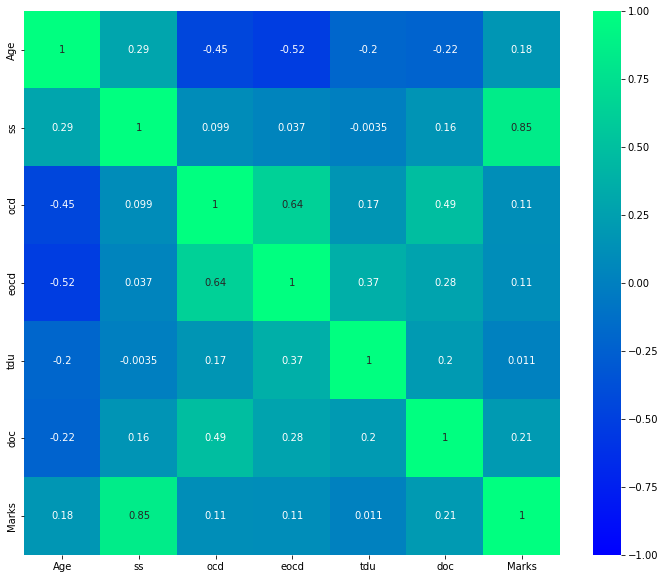

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=data.corr(method='spearman'), annot=True, vmin=-1, cmap='winter') # spearman's rank correlation
# ss, ocd, eocd, doc has cosiderable correlation
# selected these variables and validating using exploratory data analysis considering ocd and eocd has significant correlation, colleniearity must be removed

### EDA / Univariate
To detect outliers or anomolies in the data to manipulate accordingly by comparing using bivariate data analysis

<AxesSubplot:>

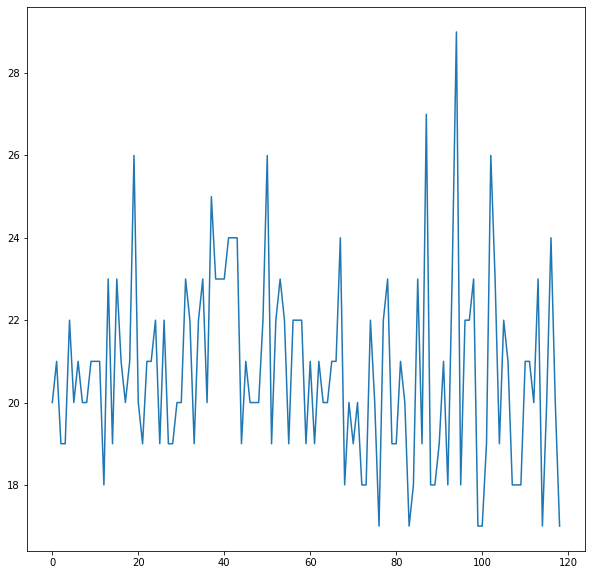

In [7]:
plt.figure(figsize=(10, 10))
data['Age'].plot()
#Age predictor has consistent line graph with possible outliers at age of 27-30 
#(because of less data available from phd students)

<AxesSubplot:>

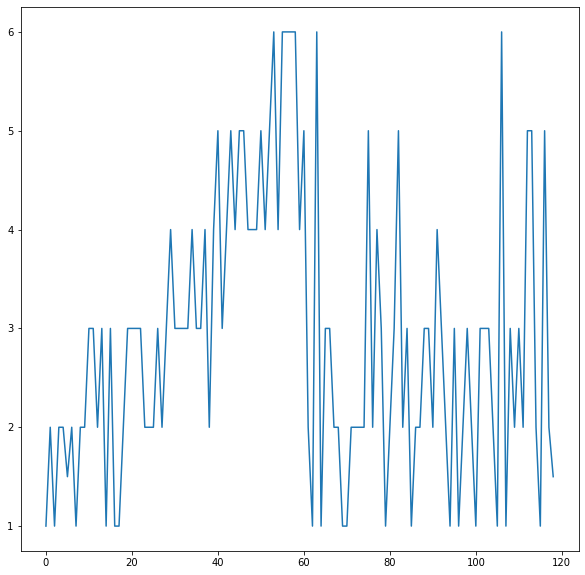

In [8]:
plt.figure(figsize=(10, 10))
data.ss.plot()
# consistent graph with no possible outliers
# possible for right skewed distribution

<AxesSubplot:xlabel='ss', ylabel='Count'>

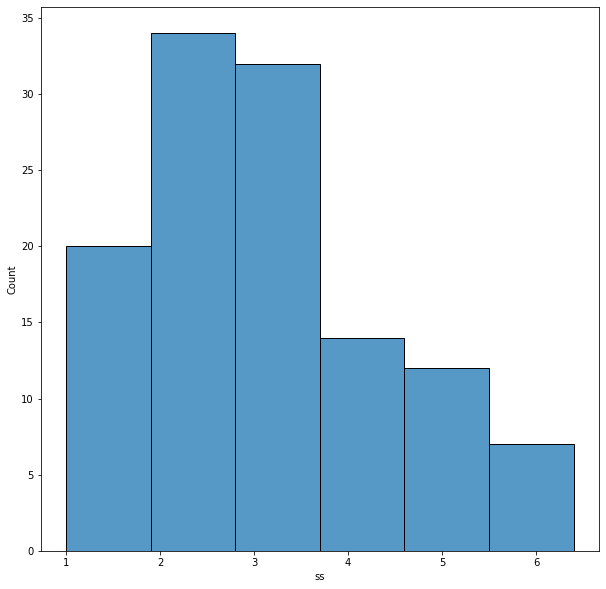

In [9]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data,binwidth=0.9, x='ss')

<AxesSubplot:>

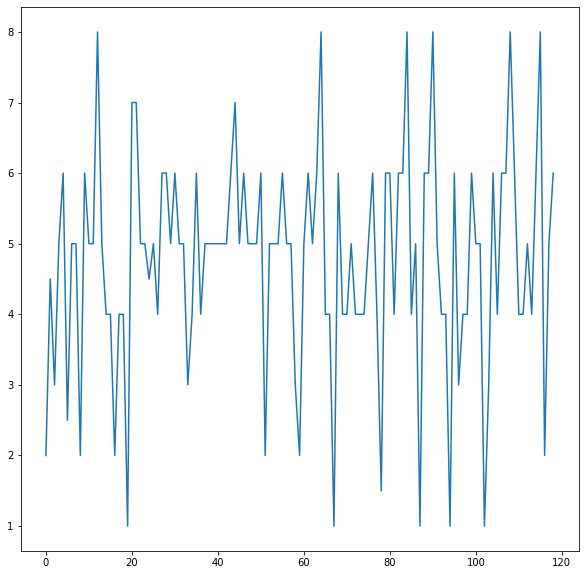

In [10]:
plt.figure(figsize=(10, 10))
data.ocd.plot()
# cosistent graph with possible outliers at 1 or consistent

<AxesSubplot:xlabel='ocd', ylabel='Count'>

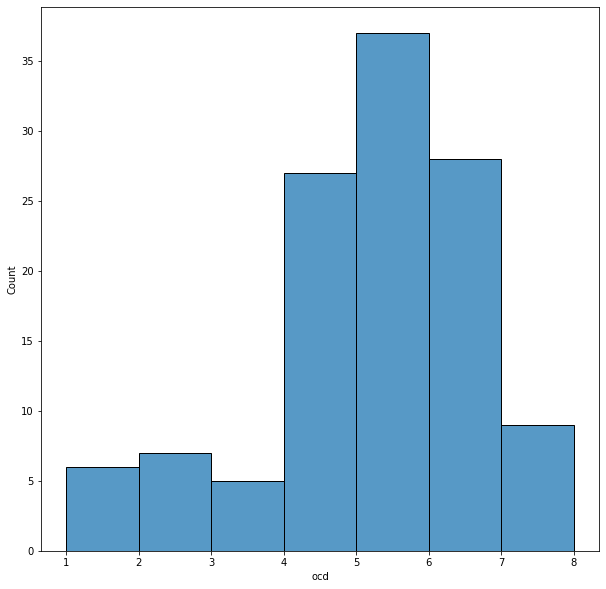

In [11]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x= 'ocd', binwidth=1)
# left skewed

<AxesSubplot:>

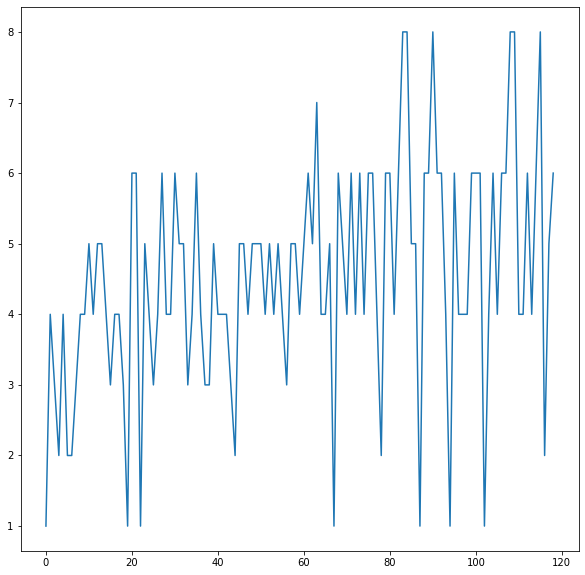

In [12]:
plt.figure(figsize=(10, 10))
data.eocd.plot()
# cosistent graph, possible outliers at 0

<AxesSubplot:xlabel='eocd', ylabel='Count'>

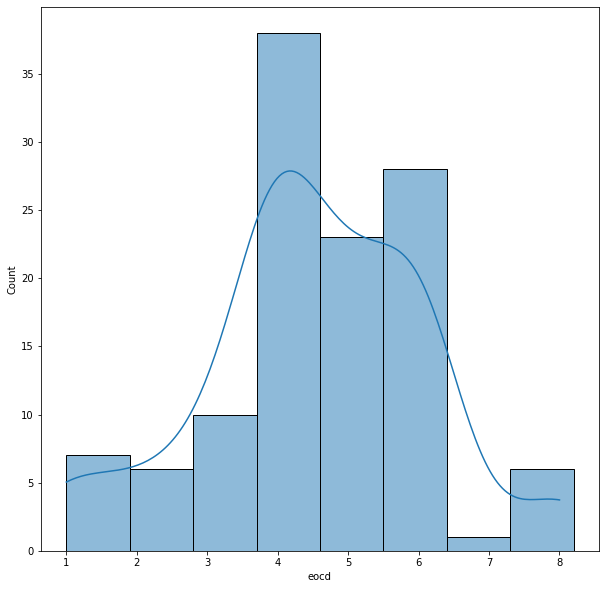

In [13]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='eocd', binwidth=0.9, kde=True)
# possibly left skewed with most of the dist. in right part of the dist.

<AxesSubplot:>

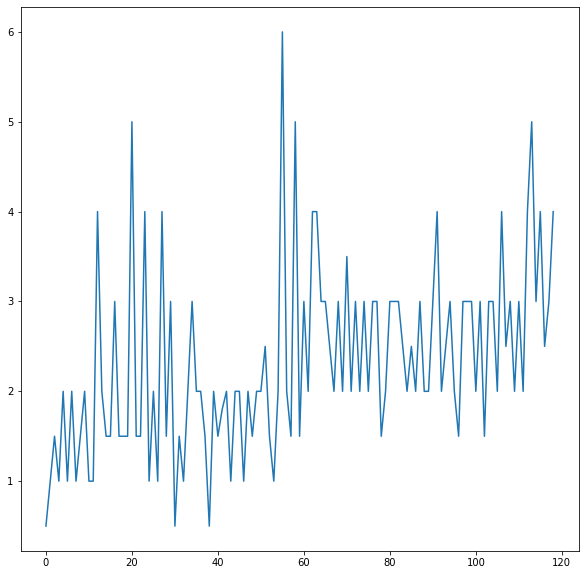

In [14]:
plt.figure(figsize=(10, 10))
data.tdu.plot()
# outlier at 6 and possibly right skewed

<AxesSubplot:xlabel='tdu', ylabel='Count'>

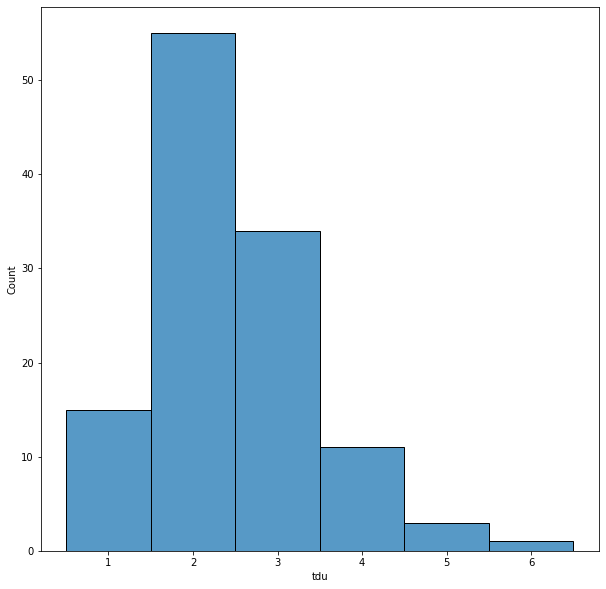

In [15]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='tdu', binwidth=1)
# right skewed with ouliers on right end of dist.

<AxesSubplot:>

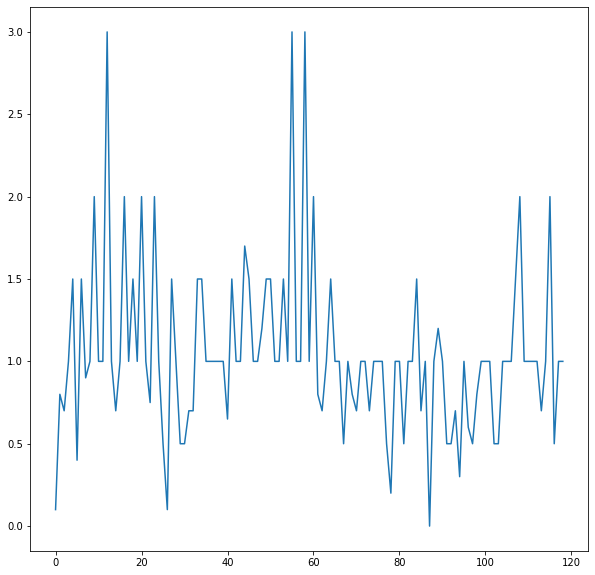

In [16]:
plt.figure(figsize=(10, 10))
data.doc.plot()
# possible outliers at 0 and 3 and possible to be right skewed

<AxesSubplot:xlabel='doc', ylabel='Count'>

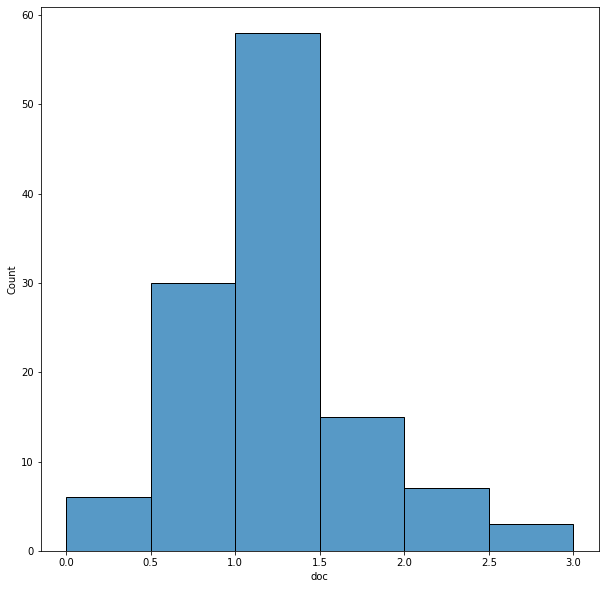

In [17]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='doc', binwidth=0.5)

Text(0.5, 1.0, 'Box plot for outlier analysis')

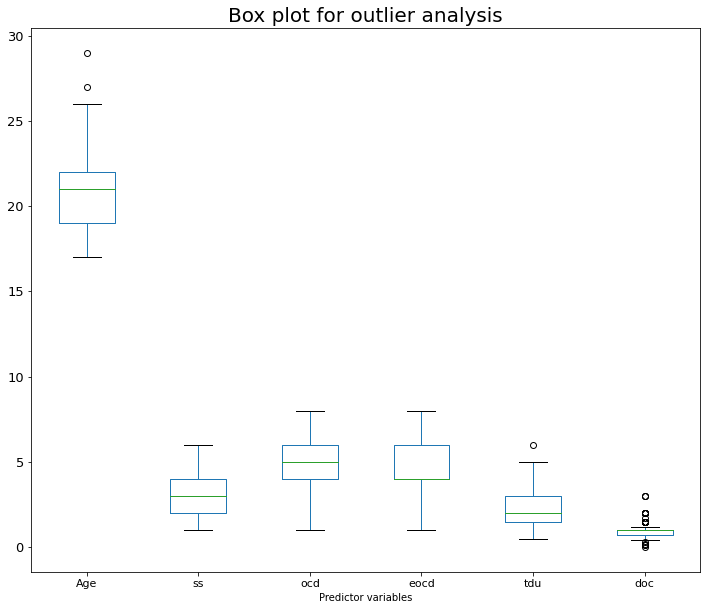

In [18]:
plt.figure(figsize=(12, 10))
data.drop('Marks', axis=1).boxplot(grid = False)
plt.xticks(size=11);
plt.yticks(size=13);
plt.xlabel('Predictor variables')
plt.title('Box plot for outlier analysis', size=20)
# Inter quartile range 

### EDA / Bivariate data analysis
Compare the response variable with avialable ordianal variables to hypothesise the impact and to select the variable for predicting the response variable.

<AxesSubplot:xlabel='Marks', ylabel='Count'>

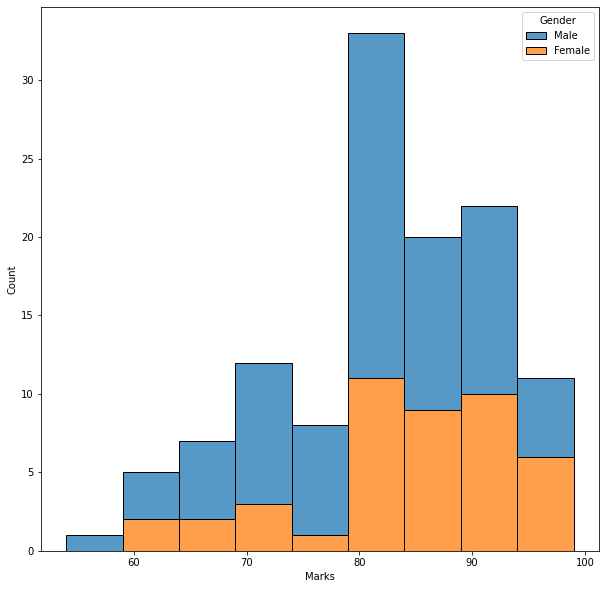

In [19]:
plt.figure(figsize=(10, 10))
sns.histplot(x=data['Marks'], hue=data['Gender'], multiple='stack', binwidth=5)
# Gender ordinal variable has no significan factoring impact on the response variable
# variable not selected

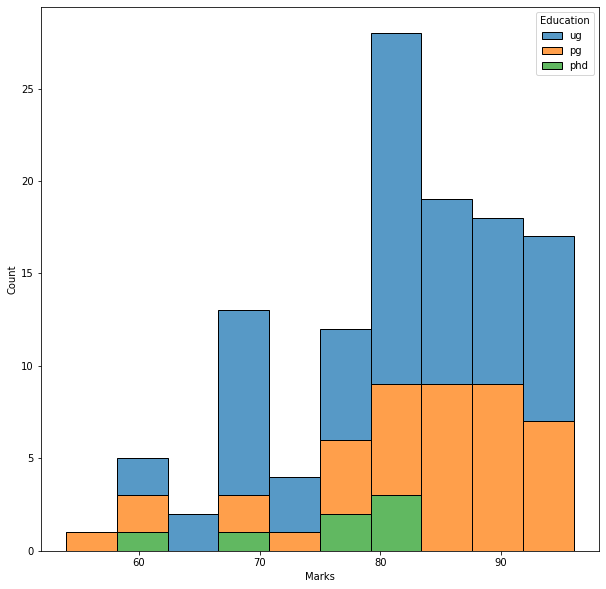

In [20]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x = 'Marks', bins=10, hue= 'Education', multiple='stack');
# Due to less avialability of data from phd students and no significant difference in impacting the response variable
# variable no selected # undecided
# testing models, pg students has less marks and compared to other grads, even though its not significant, it helped incressing 2% more accuracy

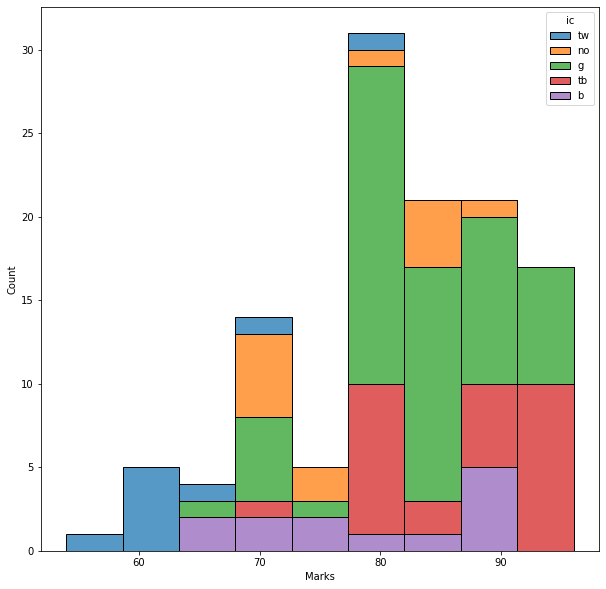

In [21]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='ic', multiple='stack');
# plt.legend( fontsize='x-large', title = "Internet speed", loc='upper left')
# Internet speed variable has impact on the response variable, people with the best and good internet connection are more likely to get good marks and agrees online classes are better
# variable selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

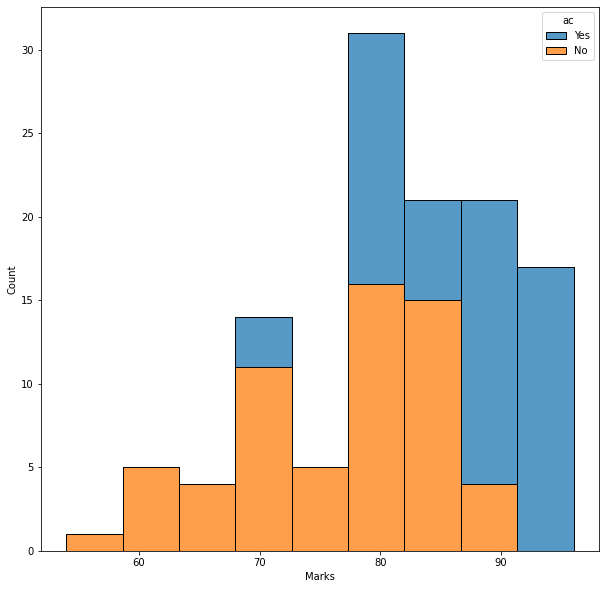

In [22]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='ac', multiple='stack', hue_order=['Yes', 'No'])
# Academic outcome has a significant impact on the response variable
# variable selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

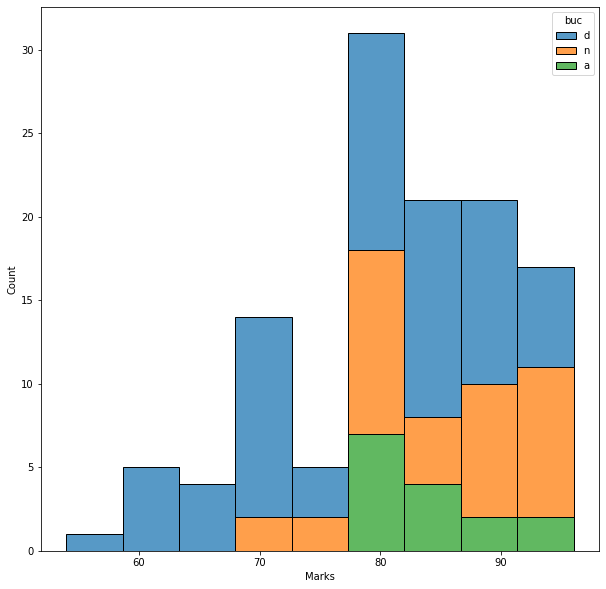

In [23]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='buc', multiple='stack')
# even though there is no significant difference of impact, most of the student with above 80 marks has agreed that online lernign is better that offline learning
# variable selected

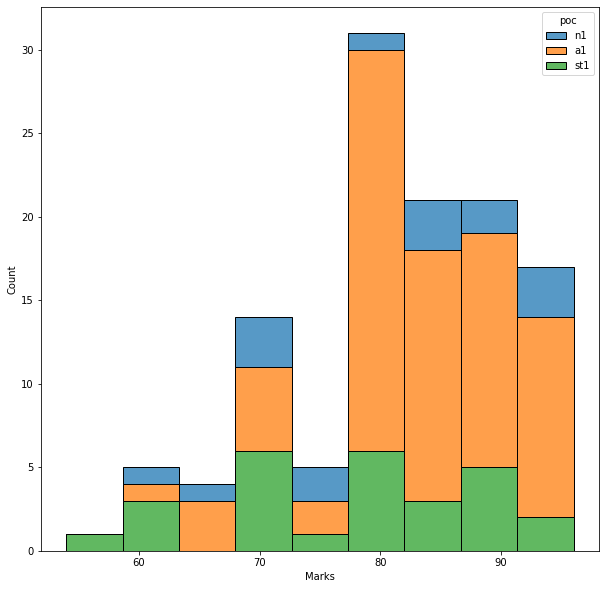

In [24]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='poc', multiple='stack');
# no impact on response variable
# variable not selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

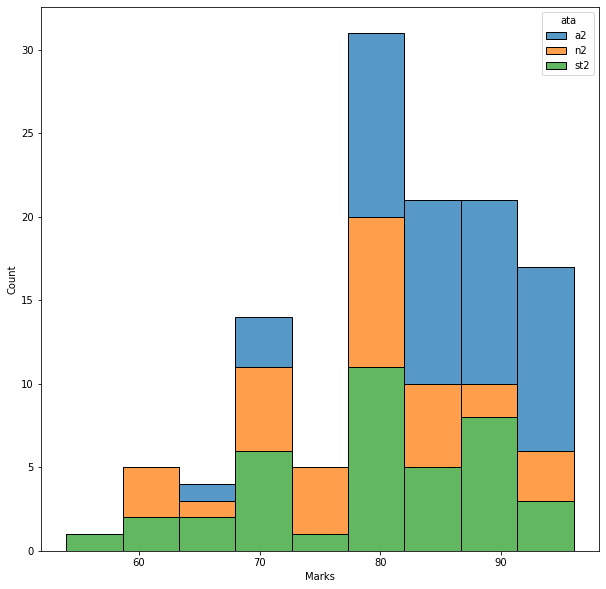

In [25]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='ata', multiple='stack')
# The higher the marks the most people agreed they are getting teachers assistance
# Even though there is no significant impact, the diffecrence in acceptence in good marks region can impact the response variable moderately
# variable selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

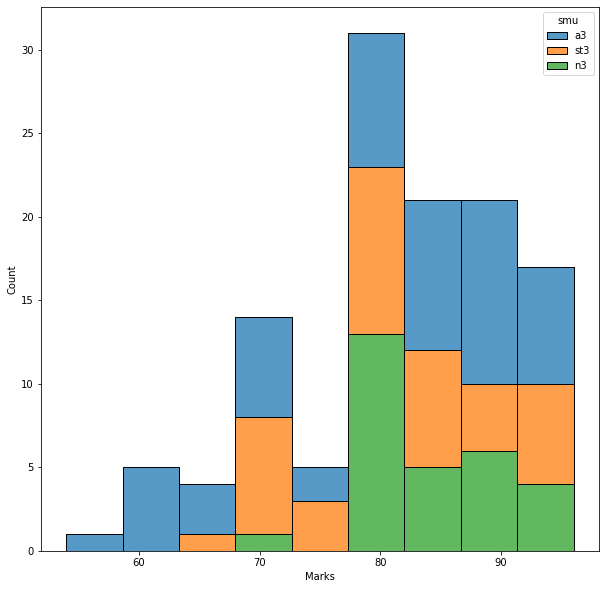

In [26]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='smu', multiple='stack')
# some people of above 75 marks has not uses socail media
# variable selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

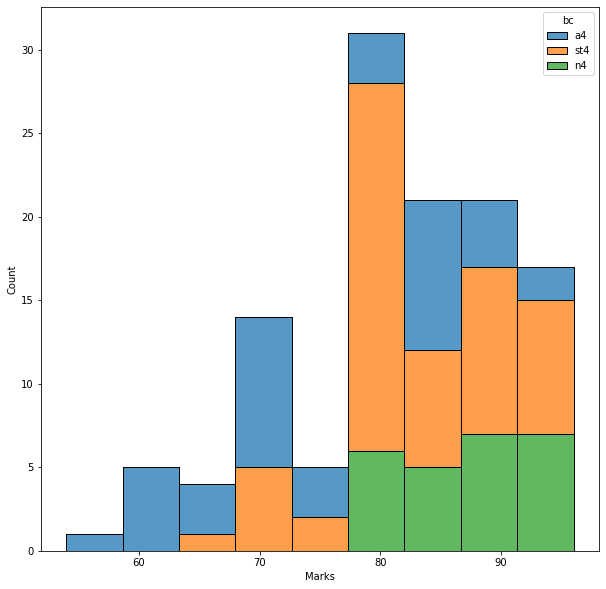

In [27]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue= 'bc', multiple='stack')
# some people above 75 have never got bored in online classes
# varible selected

<AxesSubplot:xlabel='Marks', ylabel='Count'>

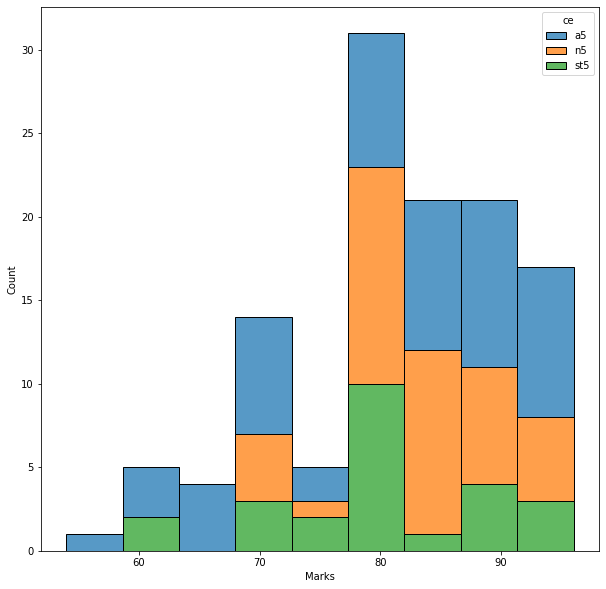

In [28]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data, x='Marks', hue='ce', multiple='stack')
# some students with more than 75 marks says, they never cheated in exams

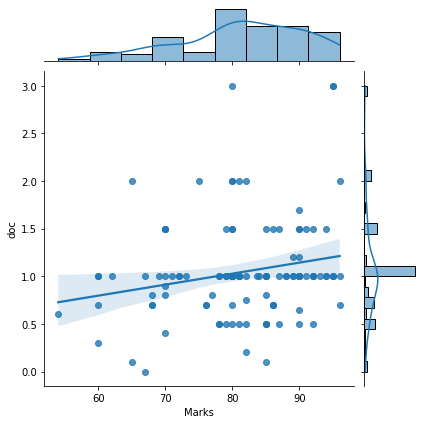

In [29]:
sns.jointplot(data=data, x='Marks', y='doc', kind='reg')

## Feature Engineering

    # Missing values and alomolies were alredy processed and manipulated sucessfully

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     119 non-null    object 
 1   Age        119 non-null    int64  
 2   Education  119 non-null    object 
 3   ss         119 non-null    float64
 4   ocd        119 non-null    float64
 5   eocd       119 non-null    int64  
 6   tdu        119 non-null    float64
 7   doc        119 non-null    float64
 8   ic         119 non-null    object 
 9   ac         119 non-null    object 
 10  buc        119 non-null    object 
 11  poc        119 non-null    object 
 12  ata        119 non-null    object 
 13  smu        119 non-null    object 
 14  bc         119 non-null    object 
 15  ce         119 non-null    object 
 16  Marks      119 non-null    float64
dtypes: float64(5), int64(2), object(10)
memory usage: 15.9+ KB


temp = pd.get_dummies(data['Education'], drop_first=True)
data = pd.concat([data, temp], axis=1)

temp = pd.get_dummies(data['ic'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#tw, b, g, b, tb

temp = pd.get_dummies(data['ac'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#Yes, No

temp = pd.get_dummies(data['buc'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#d, n, a

temp = pd.get_dummies(data['poc'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#variable not selected

temp = pd.get_dummies(data['ata'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#st2, n2, a2

temp = pd.get_dummies(data['smu'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#st3, n3, a3

temp = pd.get_dummies(data['bc'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#st4, n4, a4

temp = pd.get_dummies(data['ce'], drop_first=True)
data = pd.concat([data, temp], axis=1)
#st5, n5, a5

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     119 non-null    object 
 1   Age        119 non-null    int64  
 2   Education  119 non-null    object 
 3   ss         119 non-null    float64
 4   ocd        119 non-null    float64
 5   eocd       119 non-null    int64  
 6   tdu        119 non-null    float64
 7   doc        119 non-null    float64
 8   ic         119 non-null    object 
 9   ac         119 non-null    object 
 10  buc        119 non-null    object 
 11  poc        119 non-null    object 
 12  ata        119 non-null    object 
 13  smu        119 non-null    object 
 14  bc         119 non-null    object 
 15  ce         119 non-null    object 
 16  Marks      119 non-null    float64
dtypes: float64(5), int64(2), object(10)
memory usage: 15.9+ KB


In [32]:
# data.drop(['Gender', 'Education', 'Age', 'ocd', 'tdu', 'ic', 'ac', 'buc', 'poc', 'ata', 'smu', 'bc', 'ce'], axis=1, inplace = True)

In [33]:
# data.info()

# MLR model and Variable selection(stepwise method)

The numeric variables are selected using forward variable selection method, and the categorical variables are removed after building the model with all the categorical variables available. The ordinal scale variabels are removed based on the significance values from the summary table, AIC, BIC and adjusted R squared values.

In [34]:
temp = ols('Marks ~ Gender + Age + Education + ss + ocd + eocd + tdu + doc + ic + ac + buc + poc + ata + smu+ bc + ce', data);
model1= temp.fit()
print(model1.params)
# 16 predictor variables

Intercept           63.627567
Gender[T.Male]      -0.416923
Education[T.phd]    -8.763488
Education[T.ug]      1.472859
ic[T.g]              1.584379
ic[T.no]            -0.855523
ic[T.tb]             1.994448
ic[T.tw]           -10.418056
ac[T.Yes]            2.604965
buc[T.d]             0.456602
buc[T.n]             0.541268
poc[T.n1]           -0.189289
poc[T.st1]          -1.335949
ata[T.n2]           -1.364864
ata[T.st2]          -0.760046
smu[T.n3]           -1.098206
smu[T.st3]           0.361447
bc[T.n4]             0.791058
bc[T.st4]            0.331018
ce[T.n5]             1.008146
ce[T.st5]           -0.819092
Age                  0.372708
ss                   3.708051
ocd                 -0.592550
eocd                 0.079573
tdu                  0.090725
doc                  0.140157
dtype: float64


In [35]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.770   
Dependent Variable:  Marks            AIC:                719.2200
Date:                2021-11-26 21:15 BIC:                794.2564
No. Observations:    119              Log-Likelihood:     -332.61 
Df Model:            26               F-statistic:        16.20   
Df Residuals:        92               Prob (F-statistic): 4.02e-24
R-squared:           0.821            Scale:              20.278  
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         63.6276   8.5121  7.4749 0.0000  46.7218 80.5334
Gender[T.Male]    -0.4169   0.9992 -0.4172 0.6775  -2.4015  1.5676
Education[T.phd]  -8.7635   2.5792 -3.3978 0.0010 -13.8860 -3.6410
Education[T.ug]    1.4729   1.3424  1.0972 0.2754  -1.1932  4.1389
ic[T.g]            1.5844   1.4713  1.0769 0.2844  -1.3377  4.5065
ic[T.no]          -0.8555   2.0057 -0.4265 0.6707  -4.8391  3.1281
ic[T.tb]           1.9944   1.6636  1.1989 0.2337  -1.3096  5.2985
ic[T.tw]         -10.4181   2.1230 -4.9071 0.0000 -14.6346 -6.2015
ac[T.Yes]          2.6050   1.2372  2.1056 0.0380   0.1479  5.0621
buc[T.d]           0.4566   1.6145  0.2828 0.7780  -2.7499  3.6631
buc[T.n]           0.5413   1.5452  0.3503 0.7269  -2.5276  3.6102
poc[T.n1]         -0.1893   1.5374 -0.1231 0.9023  -3.2426  2.8641
poc[T.st1]        -1.3359   1.1268 -1.1857 0.2388  -3.5738  0.9019
ata[T.n2]         -1.3649   1.3655 -0.9995 0.3202  -4.0770  1.3472
ata[T.st2]        -0.7600   1.1327 -0.6710 0.5039  -3.0097  1.4896
smu[T.n3]         -1.0982   1.4230 -0.7718 0.4422  -3.9244  1.7280
smu[T.st3]         0.3614   1.2063  0.2996 0.7651  -2.0343  2.7572
bc[T.n4]           0.7911   1.7399  0.4547 0.6504  -2.6646  4.2467
bc[T.st4]          0.3310   1.4556  0.2274 0.8206  -2.5599  3.2220
ce[T.n5]           1.0081   1.2228  0.8245 0.4118  -1.4204  3.4367
ce[T.st5]         -0.8191   1.3487 -0.6073 0.5451  -3.4978  1.8596
Age                0.3727   0.3638  1.0244 0.3083  -0.3499  1.0953
ss                 3.7081   0.4473  8.2908 0.0000   2.8198  4.5963
ocd               -0.5925   0.4459 -1.3289 0.1872  -1.4781  0.2930
eocd               0.0796   0.4573  0.1740 0.8622  -0.8287  0.9878
tdu                0.0907   0.5010  0.1811 0.8567  -0.9042  1.0857
doc                0.1402   1.1346  0.1235 0.9020  -2.1132  2.3936
------------------------------------------------------------------
Omnibus:              0.217         Durbin-Watson:           1.243
Prob(Omnibus):        0.897         Jarque-Bera (JB):        0.369
Skew:                 -0.076        Prob(JB):                0.831
Kurtosis:             2.773         Condition No.:           464  
==================================================================

"""

In [36]:
temp = ols('Marks ~ Gender + Age + Education + ss + ocd + doc + ic + ac + buc + poc + ata + smu+ bc + ce', data);
model2= temp.fit()
print(model2.params)
# ocd and tdu variables have hign correlation with eocd, which may cause overfit of model
# but ocd has higher significance than other two variables also eocd and tdu has cofficients near to 0
# eocd and tdu variables are removed
# no change in accuracy

Intercept           64.332753
Gender[T.Male]      -0.433479
Education[T.phd]    -8.761563
Education[T.ug]      1.480654
ic[T.g]              1.576066
ic[T.no]            -0.886577
ic[T.tb]             2.002950
ic[T.tw]           -10.388077
ac[T.Yes]            2.592704
buc[T.d]             0.493687
buc[T.n]             0.563937
poc[T.n1]           -0.276198
poc[T.st1]          -1.358164
ata[T.n2]           -1.310903
ata[T.st2]          -0.732104
smu[T.n3]           -1.068532
smu[T.st3]           0.338264
bc[T.n4]             0.898165
bc[T.st4]            0.434297
ce[T.n5]             0.907229
ce[T.st5]           -0.864698
Age                  0.351614
ss                   3.712318
ocd                 -0.555764
doc                  0.207421
dtype: float64


In [37]:
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.775   
Dependent Variable:  Marks            AIC:                715.3344
Date:                2021-11-26 21:15 BIC:                784.8125
No. Observations:    119              Log-Likelihood:     -332.67 
Df Model:            24               F-statistic:        17.91   
Df Residuals:        94               Prob (F-statistic): 2.32e-25
R-squared:           0.821            Scale:              19.866  
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         64.3328   7.9473  8.0950 0.0000  48.5533 80.1122
Gender[T.Male]    -0.4335   0.9845 -0.4403 0.6607  -2.3883  1.5213
Education[T.phd]  -8.7616   2.5178 -3.4799 0.0008 -13.7607 -3.7624
Education[T.ug]    1.4807   1.3258  1.1168 0.2669  -1.1518  4.1131
ic[T.g]            1.5761   1.4537  1.0842 0.2811  -1.3102  4.4624
ic[T.no]          -0.8866   1.9819 -0.4473 0.6557  -4.8216  3.0485
ic[T.tb]           2.0029   1.6414  1.2203 0.2254  -1.2561  5.2620
ic[T.tw]         -10.3881   2.0986 -4.9499 0.0000 -14.5550 -6.2212
ac[T.Yes]          2.5927   1.2004  2.1599 0.0333   0.2093  4.9761
buc[T.d]           0.4937   1.5820  0.3121 0.7557  -2.6474  3.6347
buc[T.n]           0.5639   1.5243  0.3700 0.7122  -2.4626  3.5905
poc[T.n1]         -0.2762   1.4916 -0.1852 0.8535  -3.2378  2.6854
poc[T.st1]        -1.3582   1.1114 -1.2221 0.2247  -3.5648  0.8484
ata[T.n2]         -1.3109   1.3392 -0.9789 0.3302  -3.9700  1.3481
ata[T.st2]        -0.7321   1.1168 -0.6555 0.5137  -2.9495  1.4853
smu[T.n3]         -1.0685   1.4050 -0.7605 0.4488  -3.8582  1.7211
smu[T.st3]         0.3383   1.1807  0.2865 0.7751  -2.0061  2.6826
bc[T.n4]           0.8982   1.6532  0.5433 0.5882  -2.3842  4.1806
bc[T.st4]          0.4343   1.3738  0.3161 0.7526  -2.2933  3.1619
ce[T.n5]           0.9072   1.1611  0.7813 0.4366  -1.3982  3.2127
ce[T.st5]         -0.8647   1.3263 -0.6520 0.5160  -3.4980  1.7686
Age                0.3516   0.3466  1.0144 0.3130  -0.3366  1.0398
ss                 3.7123   0.4404  8.4302 0.0000   2.8380  4.5867
ocd               -0.5558   0.3740 -1.4860 0.1406  -1.2984  0.1868
doc                0.2074   1.0257  0.2022 0.8402  -1.8292  2.2440
------------------------------------------------------------------
Omnibus:              0.253         Durbin-Watson:           1.230
Prob(Omnibus):        0.881         Jarque-Bera (JB):        0.398
Skew:                 -0.089        Prob(JB):                0.820
Kurtosis:             2.779         Condition No.:           428  
==================================================================

"""

In [38]:
temp = ols('Marks ~ Education + Age + Gender + ss + poc + ocd + ic + ac + buc + ata + smu+ bc + ce', data);
model3= temp.fit()
print(model3.params)
# doc variable has less significance
# varaible doc removed

Intercept           64.394123
Education[T.phd]    -8.775505
Education[T.ug]      1.522060
Gender[T.Male]      -0.472347
poc[T.n1]           -0.226998
poc[T.st1]          -1.309413
ic[T.g]              1.540754
ic[T.no]            -0.933221
ic[T.tb]             1.988846
ic[T.tw]           -10.441992
ac[T.Yes]            2.603730
buc[T.d]             0.500343
buc[T.n]             0.580247
ata[T.n2]           -1.296481
ata[T.st2]          -0.711714
smu[T.n3]           -1.093295
smu[T.st3]           0.304921
bc[T.n4]             0.877783
bc[T.st4]            0.458352
ce[T.n5]             0.936234
ce[T.st5]           -0.808492
Age                  0.350700
ss                   3.725790
ocd                 -0.532463
dtype: float64


In [39]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.777   
Dependent Variable:  Marks            AIC:                713.3862
Date:                2021-11-26 21:15 BIC:                780.0851
No. Observations:    119              Log-Likelihood:     -332.69 
Df Model:            23               F-statistic:        18.88   
Df Residuals:        95               Prob (F-statistic): 5.36e-26
R-squared:           0.821            Scale:              19.665  
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         64.3941   7.9013  8.1498 0.0000  48.7081 80.0801
Education[T.phd]  -8.7755   2.5041 -3.5044 0.0007 -13.7468 -3.8042
Education[T.ug]    1.5221   1.3033  1.1678 0.2458  -1.0653  4.1094
Gender[T.Male]    -0.4723   0.9607 -0.4917 0.6241  -2.3796  1.4349
poc[T.n1]         -0.2270   1.4642 -0.1550 0.8771  -3.1337  2.6797
poc[T.st1]        -1.3094   1.0794 -1.2131 0.2281  -3.4523  0.8335
ic[T.g]            1.5408   1.4358  1.0731 0.2860  -1.3097  4.3913
ic[T.no]          -0.9332   1.9584 -0.4765 0.6348  -4.8212  2.9548
ic[T.tb]           1.9888   1.6316  1.2189 0.2259  -1.2503  5.2280
ic[T.tw]         -10.4420   2.0711 -5.0418 0.0000 -14.5536 -6.3303
ac[T.Yes]          2.6037   1.1931  2.1824 0.0315   0.2352  4.9723
buc[T.d]           0.5003   1.5736  0.3180 0.7512  -2.6237  3.6244
buc[T.n]           0.5802   1.5145  0.3831 0.7025  -2.4264  3.5869
ata[T.n2]         -1.2965   1.3305 -0.9744 0.3323  -3.9380  1.3450
ata[T.st2]        -0.7117   1.1066 -0.6432 0.5217  -2.9086  1.4852
smu[T.n3]         -1.0933   1.3926 -0.7851 0.4343  -3.8579  1.6713
smu[T.st3]         0.3049   1.1632  0.2621 0.7938  -2.0044  2.6143
bc[T.n4]           0.8778   1.6417  0.5347 0.5941  -2.3815  4.1371
bc[T.st4]          0.4584   1.3617  0.3366 0.7372  -2.2449  3.1616
ce[T.n5]           0.9362   1.1464  0.8167 0.4162  -1.3397  3.2122
ce[T.st5]         -0.8085   1.2903 -0.6266 0.5324  -3.3700  1.7530
Age                0.3507   0.3448  1.0170 0.3117  -0.3339  1.0353
ss                 3.7258   0.4331  8.6028 0.0000   2.8660  4.5856
ocd               -0.5325   0.3540 -1.5041 0.1359  -1.2353  0.1703
------------------------------------------------------------------
Omnibus:              0.239         Durbin-Watson:           1.231
Prob(Omnibus):        0.887         Jarque-Bera (JB):        0.381
Skew:                 -0.087        Prob(JB):                0.827
Kurtosis:             2.785         Condition No.:           427  
==================================================================

"""

In [40]:
temp = ols('Marks ~ Education + ss + ocd + ic + ac + buc + ata + smu+ bc + ce', data);
model4= temp.fit()
print(model4.params)
# poc, Age, and Gender variables are removed since not significant
# AIC value after including Age variable has a difference less than 2, but no significant change in accuracy, variable removed to decrease predictor variables.

Intercept           71.049442
Education[T.phd]    -7.504945
Education[T.ug]      0.805427
ic[T.g]              1.473644
ic[T.no]            -0.797408
ic[T.tb]             1.876522
ic[T.tw]           -10.367596
ac[T.Yes]            2.547195
buc[T.d]             0.582288
buc[T.n]             0.588619
ata[T.n2]           -1.527142
ata[T.st2]          -0.872390
smu[T.n3]           -1.057230
smu[T.st3]           0.358491
bc[T.n4]             0.915006
bc[T.st4]            0.669938
ce[T.n5]             0.889707
ce[T.st5]           -0.771634
ss                   3.933295
ocd                 -0.582798
dtype: float64


In [41]:
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.780   
Dependent Variable:  Marks            AIC:                708.6169
Date:                2021-11-26 21:15 BIC:                764.1994
No. Observations:    119              Log-Likelihood:     -334.31 
Df Model:            19               F-statistic:        23.04   
Df Residuals:        99               Prob (F-statistic): 3.85e-28
R-squared:           0.816            Scale:              19.390  
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         71.0494   2.8582 24.8583 0.0000  65.3782 76.7207
Education[T.phd]  -7.5049   2.2003 -3.4108 0.0009 -11.8709 -3.1390
Education[T.ug]    0.8054   0.9506  0.8473 0.3989  -1.0808  2.6917
ic[T.g]            1.4736   1.4038  1.0498 0.2964  -1.3118  4.2591
ic[T.no]          -0.7974   1.8544 -0.4300 0.6681  -4.4769  2.8820
ic[T.tb]           1.8765   1.6131  1.1633 0.2475  -1.3242  5.0773
ic[T.tw]         -10.3676   2.0208 -5.1304 0.0000 -14.3773 -6.3579
ac[T.Yes]          2.5472   1.1597  2.1963 0.0304   0.2460  4.8484
buc[T.d]           0.5823   1.5508  0.3755 0.7081  -2.4948  3.6594
buc[T.n]           0.5886   1.4965  0.3933 0.6949  -2.3808  3.5580
ata[T.n2]         -1.5271   1.2119 -1.2601 0.2106  -3.9318  0.8776
ata[T.st2]        -0.8724   1.0655 -0.8188 0.4149  -2.9865  1.2417
smu[T.n3]         -1.0572   1.3602 -0.7773 0.4389  -3.7562  1.6417
smu[T.st3]         0.3585   1.1294  0.3174 0.7516  -1.8825  2.5995
bc[T.n4]           0.9150   1.5985  0.5724 0.5683  -2.2568  4.0868
bc[T.st4]          0.6699   1.3401  0.4999 0.6182  -1.9890  3.3289
ce[T.n5]           0.8897   1.1281  0.7886 0.4322  -1.3488  3.1282
ce[T.st5]         -0.7716   1.2508 -0.6169 0.5387  -3.2534  1.7102
ss                 3.9333   0.3941  9.9817 0.0000   3.1514  4.7152
ocd               -0.5828   0.3414 -1.7072 0.0909  -1.2602  0.0946
------------------------------------------------------------------
Omnibus:              0.172         Durbin-Watson:           1.204
Prob(Omnibus):        0.918         Jarque-Bera (JB):        0.270
Skew:                 -0.085        Prob(JB):                0.874
Kurtosis:             2.841         Condition No.:           53   
==================================================================

"""

In [60]:
temp = ols('Marks ~ Education + ss + ocd + ic + ac', data);
model5= temp.fit()
print(model5.params)
# bc, buc, smu, ata, and ce

Intercept           70.818127
Education[T.phd]    -7.637045
Education[T.ug]      0.780476
ic[T.g]              1.845596
ic[T.no]            -0.272558
ic[T.tb]             1.873452
ic[T.tw]           -10.383679
ac[T.Yes]            2.957437
ss                   4.076030
ocd                 -0.640224
dtype: float64


In [59]:
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.765   
Dependent Variable: Marks            AIC:                706.0442
Date:               2021-11-26 21:20 BIC:                728.2772
No. Observations:   119              Log-Likelihood:     -345.02 
Df Model:           7                F-statistic:        55.95   
Df Residuals:       111              Prob (F-statistic): 1.59e-33
R-squared:          0.779            Scale:              20.706  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept    67.0496    2.0072  33.4048  0.0000   63.0722  71.0269
ic[T.g]       2.1066    1.4057   1.4986  0.1368   -0.6790   4.8921
ic[T.no]      0.3526    1.7932   0.1967  0.8445   -3.2006   3.9059
ic[T.tb]      1.7922    1.6015   1.1191  0.2655   -1.3812   4.9657
ic[T.tw]     -9.9763    2.0449  -4.8787  0.0000  -14.0283  -5.9242
ac[T.Yes]     2.7543    0.9875   2.7891  0.0062    0.7975   4.7112
ss            4.0893    0.3618  11.3024  0.0000    3.3724   4.8063
ocd           0.1237    0.2754   0.4492  0.6542   -0.4220   0.6695
-----------------------------------------------------------------
Omnibus:               0.159        Durbin-Watson:          1.111
Prob(Omnibus):         0.923        Jarque-Bera (JB):       0.023
Skew:                  -0.030       Prob(JB):               0.989
Kurtosis:              3.031        Condition No.:          44   
=================================================================

"""

In [61]:
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.790   
Dependent Variable:  Marks            AIC:                694.4447
Date:                2021-11-26 21:20 BIC:                722.2359
No. Observations:    119              Log-Likelihood:     -337.22 
Df Model:            9                F-statistic:        50.42   
Df Residuals:        109              Prob (F-statistic): 7.94e-35
R-squared:           0.806            Scale:              18.495  
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         70.8181   2.1925 32.3002 0.0000  66.4727 75.1636
Education[T.phd]  -7.6370   2.0915 -3.6515 0.0004 -11.7823 -3.4918
Education[T.ug]    0.7805   0.9053  0.8621 0.3905  -1.0139  2.5748
ic[T.g]            1.8456   1.3340  1.3835 0.1693  -0.7983  4.4895
ic[T.no]          -0.2726   1.7107 -0.1593 0.8737  -3.6632  3.1180
ic[T.tb]           1.8735   1.5379  1.2182 0.2258  -1.1746  4.9215
ic[T.tw]         -10.3837   1.9355 -5.3648 0.0000 -14.2198 -6.5475
ac[T.Yes]          2.9574   0.9384  3.1515 0.0021   1.0975  4.8173
ss                 4.0760   0.3481 11.7092 0.0000   3.3861  4.7660
ocd               -0.6402   0.3269 -1.9585 0.0527  -1.2881  0.0077
------------------------------------------------------------------
Omnibus:              0.160         Durbin-Watson:           1.114
Prob(Omnibus):        0.923         Jarque-Bera (JB):        0.328
Skew:                 -0.043        Prob(JB):                0.849
Kurtosis:             2.758         Condition No.:           47   
==================================================================

"""

In [49]:
model5.predict({'Education': 'ug', 'ss': 1, 'ocd': 6, 'ic': 'b', 'ac': 'No', 'ata': 'a2'})

0    71.833289
dtype: float64

In [62]:
def evaluateModel(model):
    print("RSS = ", ((data.Marks - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [66]:
evaluateModel(model5);
# our model is 81.2% accurate

RSS =  2015.955913489736
R2 =  0.8063111488888859


In [67]:
# sklearn ols model
x_train, x_test, y_train, y_test = train_test_split(data.drop('Marks', axis = 1), data['Marks'], test_size=0.1)

In [68]:
x_test.head(1)

,Gender,Age,Education,ss,ocd,eocd,tdu,doc,ic,ac,buc,poc,ata,smu,bc,ce
65,Female,21,pg,3.0,4.0,4,3.0,1.0,g,No,n,a1,n2,st3,st4,n5


In [69]:
# mlr = LinearRegression()
# mlr.fit(x_train, y_train)

In [70]:
y_prediction = mlr.predict(x_test)
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error is =',np.sqrt(mean_squared_error(y_test,y_prediction)))
# while statsmodels ols model predicting precise value for larger set
# due to small size of test data, our accuracy score is 91%, but accuracy from statsmodels should be considered for model selection since accuracy is not stable while taking smaller size test data sets

NameError: name 'mlr' is not defined

==================================================================================================================

In [71]:
df1 = pd.read_csv('SFab.csv')
df1

,Hum,Moi
0,46,12
1,53,14
2,37,11
3,42,13
4,34,10
5,29,8
6,60,17
7,44,12
8,41,10
9,48,15


In [72]:
model1 = ols('Moi ~ Hum', df1).fit()
print(model1.params)

Intercept    0.489784
Hum          0.272431
dtype: float64


In [73]:
model1.summary2()

/home/balaji/Documents/SPA/SPA/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.831   
Dependent Variable: Moi              AIC:                37.3766 
Date:               2021-11-26 21:23 BIC:                38.3464 
No. Observations:   12               Log-Likelihood:     -16.688 
Df Model:           1                F-statistic:        55.25   
Df Residuals:       10               Prob (F-statistic): 2.23e-05
R-squared:          0.847            Scale:              1.1341  
-------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.4898     1.5787   0.3102   0.7627   -3.0278   4.0074
Hum          0.2724     0.0367   7.4331   0.0000    0.1908   0.3541
-----------------------------------------------------------------
Omnibus:              0.443        Durbin-Watson:           2.034
Prob(Omnibus):        0.801        Jarque-Bera (JB):        0.510
Skew:                 0.158        Prob(JB):                0.775
Kurtosis:             2.041        Condition No.:           221  
=================================================================

"""

In [74]:
model2 = ols('Hum ~ Moi', df1).fit()
print(model2.params)

Intercept    4.952703
Moi          3.108108
dtype: float64


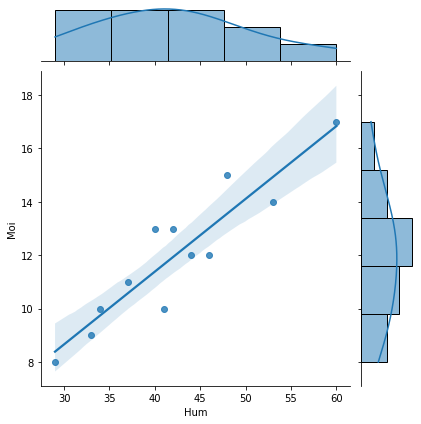

In [75]:
sns.jointplot(data=df1, x='Hum', y='Moi', kind='reg')

In [76]:
df2 = pd.read_csv('profit.csv')
df2

,x1,x2,y
0,120,19,23.8
1,200,8,24.2
2,150,12,22.0
3,180,15,26.2
4,240,16,33.5


In [77]:
model3 = ols('y ~ x1 + x2', df2).fit()
model3.params

Intercept   -0.626694
x1           0.097198
x2           0.661821
dtype: float64

In [78]:
model3.summary2(alpha=0.01)

/home/balaji/Documents/SPA/SPA/lib/python3.6/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.989  
Dependent Variable: y                AIC:                8.2019 
Date:               2021-11-26 21:23 BIC:                7.0302 
No. Observations:   5                Log-Likelihood:     -1.1010
Df Model:           2                F-statistic:        175.7  
Df Residuals:       2                Prob (F-statistic): 0.00566
R-squared:          0.994            Scale:              0.22736
-----------------------------------------------------------------
             Coef.   Std.Err.     t     P>|t|    [0.005    0.995]
-----------------------------------------------------------------
Intercept   -0.6267    1.4828  -0.4226  0.7137  -15.3433  14.0899
x1           0.0972    0.0054  17.8373  0.0031    0.0431   0.1513
x2           0.6618    0.0600  11.0348  0.0081    0.0666   1.2571
----------------------------------------------------------------
Omnibus:              nan          Durbin-Watson:          2.532
Prob(Omnibus):        nan          Jarque-Bera (JB):       1.672
Skew:                 -1.415       Prob(JB):               0.433
Kurtosis:             3.138        Condition No.:          1274 
================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [84]:
df3 = pd.read_csv('SP.csv')
df3.isna().sum()

Timestamp                                                                                             0
Email Address                                                                                         0
What gender do you identify as?                                                                       0
What is your age?                                                                                     1
Name of the University/College you are studying:                                                      0
Course of Study                                                                                       0
Highest educational qualification (or now pursuing)                                                   0
Your area of specialisation:                                                                          0
How many hours do you spend studying per day?                                                         0
What is overall duration of online classes per day? (provided by

<AxesSubplot:xlabel='Which device do you use for online classes.   (multiple options available)', ylabel='Density'>

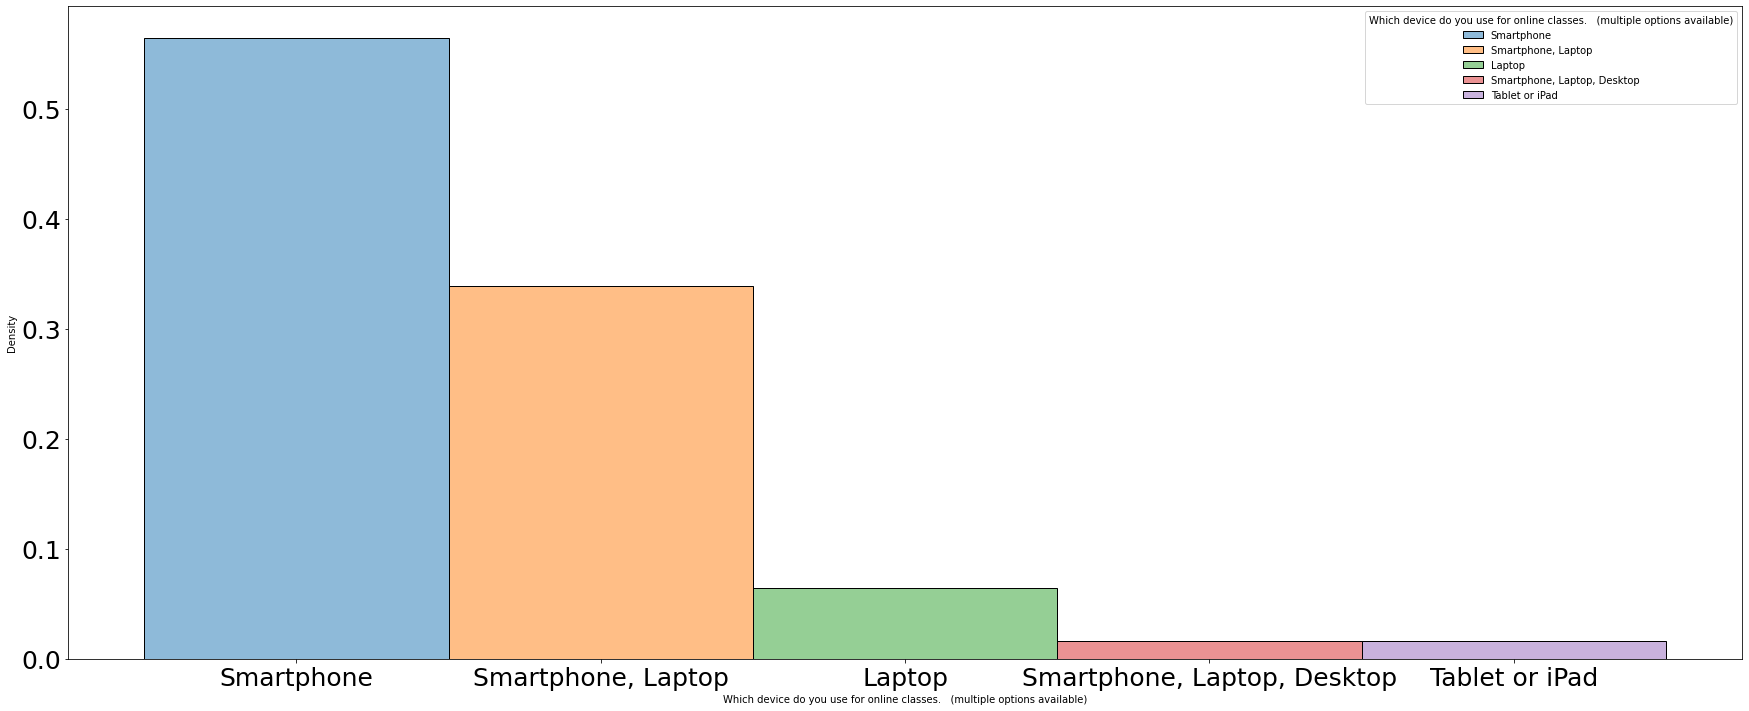

In [82]:
plt.figure(figsize=(30, 12))
plt.xticks(size=25)
plt.yticks(size=25)
sns.histplot(data=df3, x='Which device do you use for online classes.   (multiple options available)', binwidth=0.5,hue='Which device do you use for online classes.   (multiple options available)', stat='density')